In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# DataFrame to read the dataset
df = pd.read_csv("hr_employee_churn_data.csv")

In [4]:
df.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [6]:
df.shape

(14999, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empid                  14999 non-null  int64  
 1   satisfaction_level     14997 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


## Feature Engineering

First and foremost, we see the empid is non-relevant for model building. So we drop the empid column.

In [8]:
df1 = df.copy()

In [9]:
df1.drop(['empid'], axis = 1, inplace = True)

In [10]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,low,1
1,0.80,0.86,5,262,6,0,0,medium,1
2,0.11,0.88,7,272,4,0,0,medium,1
3,0.72,0.87,5,223,5,0,0,low,1
4,0.37,0.52,2,159,3,0,0,low,1


Now, we take care of the missing values

In [11]:
# Count of missing values
df1.isnull().sum()

satisfaction_level       2
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [12]:
df1['satisfaction_level'].describe()

count    14997.000000
mean         0.612863
std          0.248634
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

In [13]:
df1['satisfaction_level'].fillna(df['satisfaction_level'].mean(), inplace = True)

In [14]:
df1.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

Cateogircal value handling: Only 'salary' common has the object type categorical value, thus we will encode the values of the column

In [15]:
# categorical feature 'salary' handling with dummy variables
df1['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [16]:
dummy_salaries = pd.get_dummies(df['salary'], drop_first = True)

In [17]:
dummy_salaries

,low,medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
14994,1,0
14995,1,0
14996,1,0
14997,1,0


In [18]:
df1 = pd.concat([df1, dummy_salaries], axis = 1)

In [19]:
df1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,low,medium
0,0.38,0.53,2,157,3,0,0,low,1,1,0
1,0.80,0.86,5,262,6,0,0,medium,1,0,1
2,0.11,0.88,7,272,4,0,0,medium,1,0,1
3,0.72,0.87,5,223,5,0,0,low,1,1,0
4,0.37,0.52,2,159,3,0,0,low,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,low,1,1,0
14995,0.37,0.48,2,160,3,0,0,low,1,1,0
14996,0.37,0.53,2,143,3,0,0,low,1,1,0
14997,0.11,0.96,6,280,4,0,0,low,1,1,0


In [20]:
# drop salary column after applying encoding
df1.drop(['salary'], axis = 1, inplace = True)

In [21]:
df1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,low,medium
0,0.38,0.53,2,157,3,0,0,1,1,0
1,0.80,0.86,5,262,6,0,0,1,0,1
2,0.11,0.88,7,272,4,0,0,1,0,1
3,0.72,0.87,5,223,5,0,0,1,1,0
4,0.37,0.52,2,159,3,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,1,1,0
14995,0.37,0.48,2,160,3,0,0,1,1,0
14996,0.37,0.53,2,143,3,0,0,1,1,0
14997,0.11,0.96,6,280,4,0,0,1,1,0


## Splitting the dataset into training and testing sets

In [23]:
# split dataset into features and label
X = df1.drop(labels = "left", axis = 1)
y = df1['left']

In [24]:
# split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
len(X_train), len (X_test)

(11999, 3000)

## Model Selection

In [29]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

Two Classifiers RFClassifier and XGBClassifier will be used

In [32]:
# Creating random Parameters
model_param = {
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'param': {
            'n_estimators': [10, 50, 100, 130],
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1),
            'max_features': ['sqrt', 'log2']
        }
    },
    'XGBClassifier': {
        'model': XGBClassifier(objective = 'binary:logistic'),
        'param': {
            'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 12],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}

In [33]:
scores = []
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator = mp['model'], param_grid = mp['param'], cv = 5, return_train_score = False)
    model_selection.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

In [34]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.9185288651772814,
  'best_params': {'criterion': 'gini',
   'max_depth': 3,
   'max_features': 'log2',
   'n_estimators': 10}},
 {'model': 'XGBClassifier',
  'best_score': 0.9899995109480939,
  'best_params': {'learning_rate': 0.5, 'max_depth': 12, 'n_estimators': 100}}]

## Model Building

In [35]:
# Results above gives us XGBoost as the best and hence we use it for model building
model_xgb = XGBClassifier(objective = "binary:logistic", learning_rate = 0.5, max_depth = 12, n_estimators = 100)

In [36]:
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [37]:
model_xgb.score(X_test, y_test)

0.9906666666666667

In [38]:
X_test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,low,medium
1670,0.44,0.57,2,141,3,0,0,0,1
13378,0.55,0.96,3,194,3,0,0,0,1
10233,0.72,0.67,5,210,2,0,0,0,1
4719,0.96,0.75,4,177,2,0,0,1,0
7003,0.96,0.54,3,198,3,0,0,1,0


In [39]:
X_test[:1]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,low,medium
1670,0.44,0.57,2,141,3,0,0,0,1


In [40]:
model_xgb.predict(X_test[:1])

array([1])

In [41]:
df1.loc[1670]

satisfaction_level         0.44
last_evaluation            0.57
number_project             2.00
average_montly_hours     141.00
time_spend_company         3.00
Work_accident              0.00
promotion_last_5years      0.00
left                       1.00
low                        0.00
medium                     1.00
Name: 1670, dtype: float64

In [43]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model_xgb.predict(X_test))

In [44]:
cm

array([[2288,   11],
       [  17,  684]], dtype=int64)

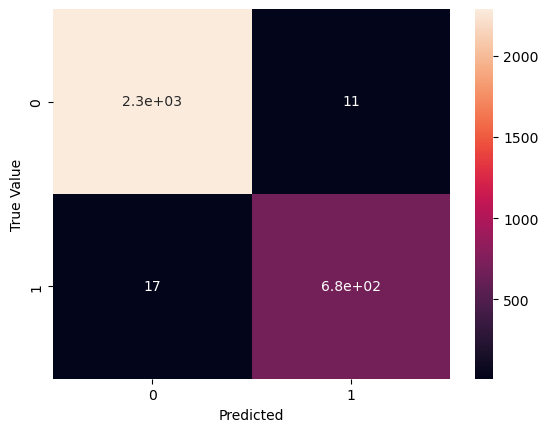

In [45]:
# Confusion matrix heat map
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()